### Predict The Stock Market With Machine Learning

https://www.youtube.com/watch?v=1O_BenficgE

#### Scarico dei dati

In [1]:
import yfinance as yf

In [2]:
start = '1950-01-01'

In [3]:
sp500 = yf.download('^GSPC',start='1950-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2024-05-30,5259.770020,5260.209961,5222.100098,5235.479980,5235.479980,3818750000
2024-05-31,5243.209961,5280.330078,5191.680176,5277.509766,5277.509766,5437160000
2024-06-03,5297.149902,5302.109863,5234.319824,5283.399902,5283.399902,4046920000


In [5]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-03',
               '2024-06-04', '2024-06-05'],
              dtype='datetime64[ns]', name='Date', length=18727, freq=None)

In [6]:
del sp500['Adj Close']

<Axes: xlabel='Date'>

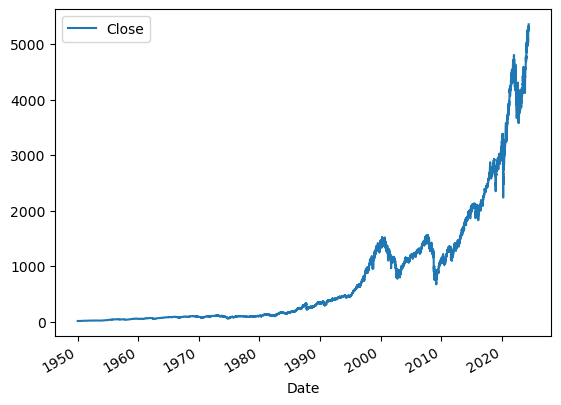

In [7]:
sp500.plot.line(y='Close', use_index=True)

#### Definiamo il target di previsione

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2024-05-30,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,5277.509766
2024-05-31,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,5283.399902
2024-06-03,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,5291.339844


In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2024-05-30,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,5277.509766,1
2024-05-31,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,5283.399902,1
2024-06-03,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,5291.339844,1


In [10]:
sp500 = sp500.loc["1990-01-01":].copy()

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-30,5259.770020,5260.209961,5222.100098,5235.479980,3818750000,5277.509766,1
2024-05-31,5243.209961,5280.330078,5191.680176,5277.509766,5437160000,5283.399902,1
2024-06-03,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,5291.339844,1


In [12]:
sp500.dropna(inplace = True)

#### Addestramento del modello

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)


In [45]:
train = sp500.iloc[:-300]
test = sp500.iloc[-300:]

In [46]:
test.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-03-27,3982.929932,4003.830078,3970.489990,3977.530029,4233540000,3971.270020,0
2023-03-28,3974.129883,3979.199951,3951.530029,3971.270020,4014600000,4027.810059,1
2023-03-29,3999.530029,4030.590088,3999.530029,4027.810059,4145250000,4050.830078,1
2023-03-30,4046.739990,4057.850098,4032.100098,4050.830078,3930860000,4109.310059,1
2023-03-31,4056.179932,4110.750000,4056.179932,4109.310059,4525120000,4124.509766,1


In [47]:
predictors = ["Close","Volume","Open","High","Low"]

In [48]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [49]:
from sklearn.metrics import precision_score

In [50]:
preds = model.predict(test[predictors])

In [51]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
import pandas as pd
preds = pd.Series(preds, index = test.index)

In [53]:
preds

Date
2023-03-27    0
2023-03-28    0
2023-03-29    0
2023-03-30    0
2023-03-31    1
             ..
2024-05-29    0
2024-05-30    0
2024-05-31    0
2024-06-03    0
2024-06-04    0
Length: 300, dtype: int32

In [54]:
precision_score(test["Target"], preds)

0.5564516129032258

In [55]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

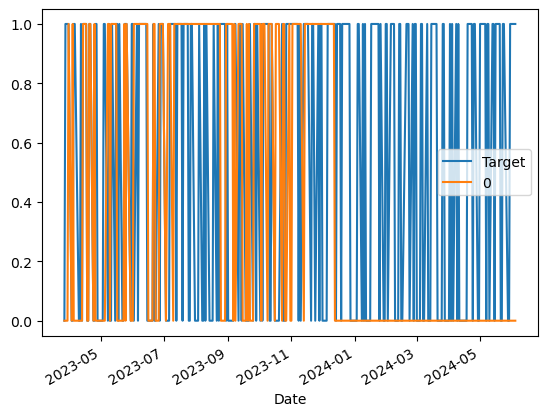

In [56]:
combined.plot()

#### Creazione del back test

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [28]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        tran = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [29]:
predictions = backtest(sp500, model, predictors)

In [30]:
predictions["Predictions"].value_counts()

Predictions
1    3914
0    2258
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.7189575881451201

In [32]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534997
0    0.465003
Name: count, dtype: float64

#### Aumentare il numero di previsori

In [33]:
horizons = [2, 5, 60, 250, 1000]

In [60]:
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500.loc[:,ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500.loc[:,trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]



In [61]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-11-28,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-01,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1997-12-02,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1997-12-03,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.011095,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,5340.259766,5341.879883,5256.930176,5267.839844,3869520000,5304.720215,1,0.996296,0.993645,1.020349,1.123878,1.259840,0.0,3.0,31.0,140.0,529.0
2024-05-24,5281.450195,5311.649902,5278.390137,5304.720215,3005510000,5306.040039,1,1.003488,1.000547,1.026802,1.130686,1.267995,1.0,3.0,31.0,140.0,530.0
2024-05-28,5315.910156,5315.910156,5280.890137,5306.040039,3751540000,5266.950195,0,1.000124,1.000874,1.026498,1.129907,1.267670,2.0,3.0,31.0,140.0,530.0


In [62]:
sp500 = sp500.dropna()

In [71]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
2001-11-20,1151.060059,1152.449951,1142.170044,1142.660034,1330200000,1137.030029,0,0.996338,0.999559,1.048050,0.939880,0.910431,1.0,3.0,29.0,120.0,504.0
2001-11-21,1142.660034,1142.660034,1129.780029,1137.030029,1029300000,1150.339966,1,0.997530,0.995362,1.043337,0.935960,0.905814,0.0,2.0,28.0,120.0,503.0
2001-11-23,1137.030029,1151.050049,1135.900024,1150.339966,410300000,1157.420044,1,1.005819,1.005588,1.055740,0.947516,0.916289,1.0,2.0,29.0,121.0,503.0
2001-11-26,1150.339966,1157.880005,1146.170044,1157.420044,1129800000,1149.500000,0,1.003068,1.008467,1.062685,0.953945,0.921792,2.0,3.0,29.0,121.0,504.0
2001-11-27,1157.420044,1163.380005,1140.810059,1149.500000,1288000000,1128.520020,0,0.996567,1.001839,1.055893,0.947957,0.915359,1.0,2.0,29.0,121.0,503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,5340.259766,5341.879883,5256.930176,5267.839844,3869520000,5304.720215,1,0.996296,0.993645,1.020349,1.123878,1.259840,0.0,3.0,31.0,140.0,529.0
2024-05-24,5281.450195,5311.649902,5278.390137,5304.720215,3005510000,5306.040039,1,1.003488,1.000547,1.026802,1.130686,1.267995,1.0,3.0,31.0,140.0,530.0
2024-05-28,5315.910156,5315.910156,5280.890137,5306.040039,3751540000,5266.950195,0,1.000124,1.000874,1.026498,1.129907,1.267670,2.0,3.0,31.0,140.0,530.0


In [72]:
predictors = sp500[['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']]

#### Miglioramento del modello

In [73]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [74]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:1]
    preds[preds >= 0.6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [75]:
predictions = backtest(sp500, model, predictors)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [58]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', 'Close_Ratio_250',
       'Close_Ratio_1000', 'Trend_2', 'Trend_5', 'Trend_60', 'Trend_250',
       'Trend_1000'],
      dtype='object')